# Exercícios Teóricos

### Questão 1:
O que é o método de bagging e como ele ajuda a reduzir a variância de modelos de aprendizado de máquina?

R: Bagging é um método de Machine Learning em que realizamos a amostragem aleatória de instâncias que farão parte do conjunto de treino, com a ressalva de que estes dados podem ser repetidos (inseridos no subconjunto mais de uma vez). A partir de cada subconjunto escolhido, um modelo diferente de ML é treinado, de forma paralela (o número de modelos treinados é determinado por um hiperparâmetro). O resultado final é decidido pela maior votação (no caso de problemas de classificação) ou na média dos valores encontrados entre os modelos independentes, no caso de problemas de regressão. Esse método ajuda a reduzir a variância dos modelos pois os erros de um modelo dificilmente serão iguais aos de outro modelo (devido à aleatoriedade dos dados), então no fim das contas eles acabam se anulando - o erro fica "diluído" no montante de modelos treinados. Além disso, o resultado final é calculado através da média dos modelos. Desda forma, o modelo final fica menos sensível a outliers.

### Questão 2:
Explique como funciona o método de boosting e por que ele é considerado um processo de aprendizado sequencial.

R: Já o boosting é uma forma de treinar modelos em sequência, em que um modelo aprende com os erros do seu antecessor e vai se aprimorando iterativamente. A partir de um modelo inicial ruim/fraco, partimos para um segundo modelo, que irá trabalhar com os resíduos (erros) do modelo anterior, e assim por diante até chegarmos a um ponto de parada especificado. É considerado um processo sequencial justamente por ser constituído pela encadeamento de modelos, em que após o treinamento de um, outro é treinado em seguida. Não há processos em paralelo, diferentemente do bagging.

### Questão 3:
Compare os métodos Random Forest e AdaBoost em relação à forma como os modelos são construídos e combinados. Em que tipos de problemas cada um tende a se sair melhor?

R: O Random Forest é um ensamble model constituído pelo método de bagging aplicado a várias árvores de decisão, que são treinadas em paralelo. É um bom modelo para problemas com dados não lineares, com grandes dimensionalidades ou com a existência de um grande número de outliers. Já o AdaBoost é um ensamble model constituído pelo método de boosting, em que um modelo fraco inicial é criado e treinado e modelos consecutivos são treinados com base nos erros do modelo antecedente à ele, sendo um modelo que opera de forma sequencial. Desta forma, funciona melhor em problemas com dados com relação lineares, com datasets menores e com menos outliers/ruídos - como são focados nos erros, são mais sensíveis a ruídos.

### Questão 4:
Quais são as principais vantagens e limitações do uso de modelos de ensemble em aprendizado de máquina? Cite pelo menos dois pontos positivos e dois negativos.

R:
* Positivos:
1.   Menor tendência a overfitting
2.   Melhor capacidade de generalização
3.   Melhor performance do que modelos simples

* Negativos:
1. Menor interpretabilidade do que modelos individuais
2. Maior custo computacional, pois são modelos mais complexos


# Exercícios Práticos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, auc, roc_curve, make_scorer

### Questão 1:
Carregue o dataset bank.csv, remova a coluna duration (que só está disponível após o contato com o cliente), e exiba as primeiras linhas. Verifique se há valores ausentes e converta todas as variáveis categóricas em variáveis numéricas utilizando pd.get_dummies.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

df_bank = pd.DataFrame(data=bank_marketing.data.original)
df_bank = df_bank.drop(columns=['duration'])
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,1,-1,0,NaN,no


In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_bank, title="Análise Exploratória Inicial")
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_bank.isna().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:
df_bank.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,1,-1,0,failure,no


In [ ]:
for col in df_bank.columns:
    mode_val = df_bank[col].mode()
    if not mode_val.empty:
        df_bank[col] = df_bank[col].fillna(mode_val[0])

In [ ]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,failure,no


In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_bank_encoded = pd.get_dummies(df_bank, columns=categorical_cols)
df_bank_encoded

,age,balance,day_of_week,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,1,-1,0,no,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,44,29,5,1,-1,0,no,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,33,2,5,1,-1,0,no,False,False,True,...,False,False,False,True,False,False,False,True,False,False
3,47,1506,5,1,-1,0,no,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,33,1,5,1,-1,0,no,False,True,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,yes,False,False,False,...,False,False,False,False,True,False,False,True,False,False
45207,71,1729,17,2,-1,0,yes,False,False,False,...,False,False,False,False,True,False,False,True,False,False
45208,72,5715,17,5,184,3,yes,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45209,57,668,17,4,-1,0,no,False,True,False,...,False,False,False,False,True,False,False,True,False,False


### Questão 2:
Separe a variável alvo (y, onde yes = 1 e no = 0) e as variáveis preditoras. Divida o conjunto em treino e teste com 70% para treino, utilizando train_test_split com stratify=y.

In [ ]:
X = df_bank_encoded.drop(columns=['y'])
y = df_bank_encoded['y']

In [ ]:
display(y)

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [ ]:
y = y.map({'yes': 1, 'no': 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Questão 3:
Treine um modelo de Random Forest (RandomForestClassifier) com validação cruzada (5-fold). Avalie o desempenho médio utilizando acurácia, precisão, recall e F1-score.

In [ ]:
results = []
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth = 3, max_features=0.8)
rf.fit(X_train, y_train)
cv = cross_validate(rf, X, y, cv=5, scoring=('accuracy', 'recall', 'precision', 'f1'))

results.append({
    'model': 'Random Forest Sklearn',
    'accuracy': f"{(cv['test_accuracy'].mean()) * 100 :.3f}%",
    'recall': f"{(cv['test_recall'].mean()) * 100:.3f}%",
    'precision': f"{(cv['test_precision'].mean()) * 100:.3f}%",
    'f1': f"{(cv['test_f1'].mean()) * 100:.3f}%",
    'y_pred': rf.predict(X_test),
    'y_proba': rf.predict_proba(X_test)[:, 1]
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,accuracy,recall,precision,f1
0,Random Forest Sklearn,73.440%,18.280%,29.276%,12.778%


### Questão 4:
Implemente manualmente um ensemble estilo Random Forest utilizando pelo menos 5 árvores de profundidade 3, criadas com DecisionTreeClassifier (sem usar RandomForestClassifier). Aplique amostragem de linhas e de features. Compare o desempenho com o modelo do exercício anterior. Em seguida, varie o max_depth e observe o impacto na performance.

In [ ]:
#Max_depth = 3
from collections import Counter

def manual_random_forest(X, y, X_test, n_estimators=100, sample_ratio=0.8, feature_ratio=0.8):
    n_samples = int(sample_ratio * len(X))
    n_features = int(feature_ratio * X.shape[1])
    trees = []
    features_list = []

    for current_tree in range(n_estimators):
        sample_idx = np.random.choice(len(X), size=n_samples, replace=True)
        X_sample = X[sample_idx]
        y_sample = y.iloc[sample_idx]

        feature_idx = np.random.choice(X.shape[1], size=n_features, replace=False)
        features_list.append(feature_idx)

        tree = DecisionTreeClassifier(max_depth=3, random_state=42)
        tree.fit(X_sample[:, feature_idx], y_sample)
        trees.append(tree)

    all_preds = []
    for tree, feat in zip(trees, features_list):
        preds = tree.predict(X_test[:, feat])
        all_preds.append(preds)

    all_preds = np.array(all_preds).T
    final_preds = [Counter(row).most_common(1)[0][0] for row in all_preds]
    return np.array(final_preds)

y_pred_manual_rf = manual_random_forest(X_train, y_train, X_test)

results.append({
    'model': 'Manual Random Forest (max_depth=3)',
    'accuracy': f'{(accuracy_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'recall': f'{(recall_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'precision': f'{(precision_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'f1': f'{(f1_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'y_pred': y_pred_manual_rf,
    'y_proba': None
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

,model,accuracy,recall,precision,f1
0,Random Forest Sklearn,73.440%,18.280%,29.276%,12.778%
1,Manual Random Forest (max_depth=3),89.516%,19.030%,68.793%,29.812%


In [ ]:
#max_depth = 20
from collections import Counter

def manual_random_forest(X, y, X_test, n_estimators=100, sample_ratio=0.8, feature_ratio=0.8):
    n_samples = int(sample_ratio * len(X))
    n_features = int(feature_ratio * X.shape[1])
    trees = []
    features_list = []

    for current_tree in range(n_estimators):
        sample_idx = np.random.choice(len(X), size=n_samples, replace=True)
        X_sample = X[sample_idx]
        y_sample = y.iloc[sample_idx]

        feature_idx = np.random.choice(X.shape[1], size=n_features, replace=False)
        features_list.append(feature_idx)

        tree = DecisionTreeClassifier(max_depth=20, random_state=42)
        tree.fit(X_sample[:, feature_idx], y_sample)
        trees.append(tree)

    all_preds = []
    for tree, feat in zip(trees, features_list):
        preds = tree.predict(X_test[:, feat])
        all_preds.append(preds)

    all_preds = np.array(all_preds).T
    final_preds = [Counter(row).most_common(1)[0][0] for row in all_preds]
    return np.array(final_preds)

y_pred_manual_rf = manual_random_forest(X_train, y_train, X_test)
results.append({
    'model': 'Manual Random Forest (max_depth=20)',
    'accuracy': f'{(accuracy_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'recall': f'{(recall_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'precision': f'{(precision_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'f1': f'{(f1_score(y_test, y_pred_manual_rf) * 100):.3f}%',
    'y_pred': y_pred_manual_rf,
    'y_proba': None
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

,model,accuracy,recall,precision,f1
0,Random Forest Sklearn,73.440%,18.280%,29.276%,12.778%
1,Manual Random Forest (max_depth=3),89.516%,19.030%,68.793%,29.812%
2,Manual Random Forest (max_depth=20),89.730%,21.676%,69.636%,33.061%


### Questão 5:
Treine um modelo de AdaBoost com validação cruzada utilizando AdaBoostClassifier com árvores de profundidade 1 como base learner. Avalie o desempenho médio no conjunto de teste.

In [ ]:
base_learner = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(estimator=base_learner, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
cv = cross_validate(ada, X, y, cv=5, scoring=('accuracy', 'recall', 'precision', 'f1'))
results.append({
    'model': 'AdaBoost Sklearn',
    'accuracy': f"{(cv['test_accuracy'].mean()) * 100 :.3f}%",
    'recall': f"{(cv['test_recall'].mean()) * 100:.3f}%",
    'precision': f"{(cv['test_precision'].mean()) * 100:.3f}%",
    'f1': f"{(cv['test_f1'].mean()) * 100:.3f}%",
    'y_pred': ada.predict(X_test),
    'y_proba': ada.predict_proba(X_test)[:, 1]
})

results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,accuracy,recall,precision,f1
0,Random Forest Sklearn,73.440%,18.280%,29.276%,12.778%
1,Manual Random Forest (max_depth=3),89.516%,19.030%,68.793%,29.812%
2,Manual Random Forest (max_depth=20),89.730%,21.676%,69.636%,33.061%
3,AdaBoost Sklearn,81.697%,14.632%,18.973%,12.902%


### Questão 6:
Treine modelos de Gradient Boosting utilizando o XGBClassifier (XGBoost) e o LGBMClassifier (LightGBM), ambos com validação cruzada. Compare os desempenhos com os modelos anteriores.

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
cv = cross_validate(xgb_model, X, y, cv=5, scoring=('accuracy', 'recall', 'precision', 'f1'))
results.append({
    'model': 'XGBoost',
    'accuracy': f"{(cv['test_accuracy'].mean()) * 100 :.3f}%",
    'recall': f"{(cv['test_recall'].mean()) * 100:.3f}%",
    'precision': f"{(cv['test_precision'].mean()) * 100:.3f}%",
    'f1': f"{(cv['test_f1'].mean()) * 100:.3f}%",
    'y_pred': xgb_model.predict(X_test),
    'y_proba': xgb_model.predict_proba(X_test)[:, 1]
})
results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

#não sei pq obtive métricas tão ruins nesse Gradient Boosting. tentei mudar os conjuntos de treino e teste diversas vezes pra tentar melhorar, mas não obtive sucesso


,model,accuracy,recall,precision,f1
0,Random Forest Sklearn,73.440%,18.280%,29.276%,12.778%
1,Manual Random Forest (max_depth=3),89.516%,19.030%,68.793%,29.812%
2,Manual Random Forest (max_depth=20),89.730%,21.676%,69.636%,33.061%
3,AdaBoost Sklearn,81.697%,14.632%,18.973%,12.902%
4,XGBoost,34.754%,19.868%,3.667%,6.185%
5,LightGBM,56.797%,18.639%,4.701%,7.506%
6,XGBoost,34.754%,19.868%,3.667%,6.185%


In [ ]:
lgbm = lgb.LGBMClassifier(verbose=-1, random_state=42, max_depth=3)
lgbm.fit(X_train, y_train)
cv = cross_validate(lgbm, X, y, cv=5, scoring=('accuracy', 'recall', 'precision', 'f1'))
results.append({
    'model': 'LightGBM',
    'accuracy': f"{(cv['test_accuracy'].mean()) * 100 :.3f}%",
    'recall': f"{(cv['test_recall'].mean()) * 100:.3f}%",
    'precision': f"{(cv['test_precision'].mean()) * 100:.3f}%",
    'f1': f"{(cv['test_f1'].mean()) * 100:.3f}%",
    'y_pred': lgbm.predict(X_test),
    'y_proba': lgbm.predict_proba(X_test)[:, 1]
})
results_df = pd.DataFrame(results)
results_df = results_df.drop(columns=['y_pred', 'y_proba'])
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,model,accuracy,recall,precision,f1
0,Random Forest Sklearn,73.440%,18.280%,29.276%,12.778%
1,Manual Random Forest (max_depth=3),89.516%,19.030%,68.793%,29.812%
2,Manual Random Forest (max_depth=20),89.730%,21.676%,69.636%,33.061%
3,AdaBoost Sklearn,81.697%,14.632%,18.973%,12.902%
4,XGBoost,34.754%,19.868%,3.667%,6.185%
5,LightGBM,56.797%,18.639%,4.701%,7.506%


### Questão 7:
Plote as curvas ROC dos seguintes modelos: Random Forest, AdaBoost, XGBoost e LightGBM. Compare visualmente os desempenhos de todos os classificadores.

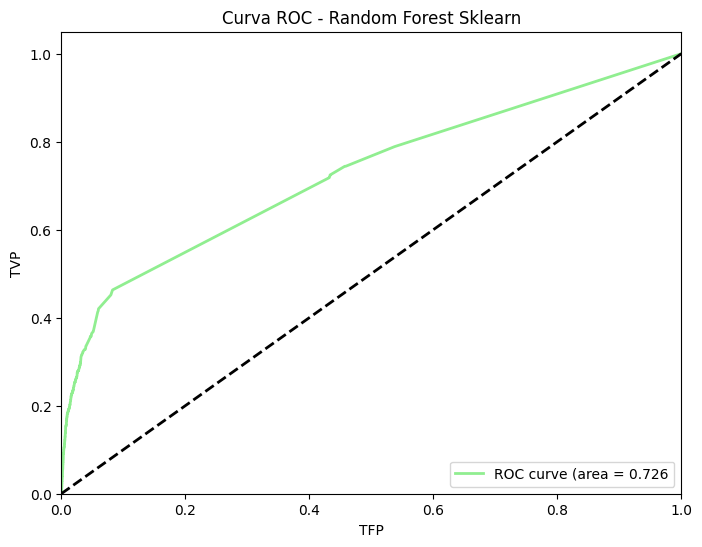

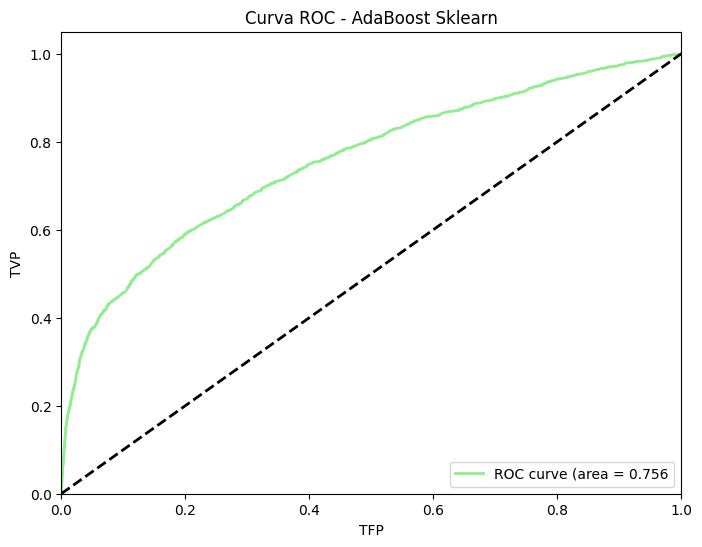

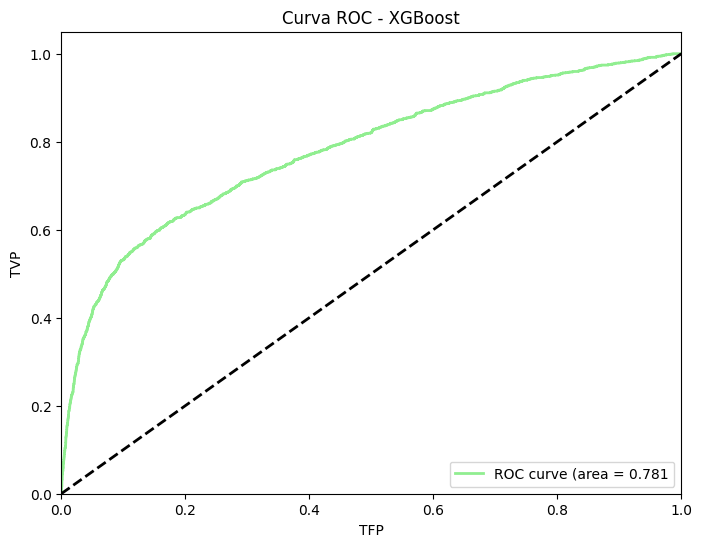

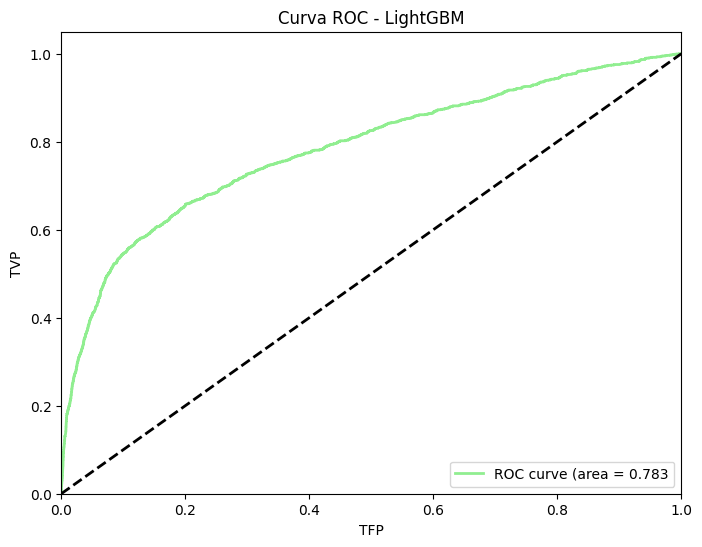

In [ ]:
roc_models = ['Random Forest Sklearn', 'AdaBoost Sklearn', 'XGBoost', 'LightGBM']

for model in results:
  model_name = model['model']

  if model_name in roc_models:
    y_pred = model['y_pred']
    y_proba = model['y_proba']

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='lightgreen', lw=2, label=f'ROC curve (area = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('TFP')
    plt.ylabel('TVP')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show

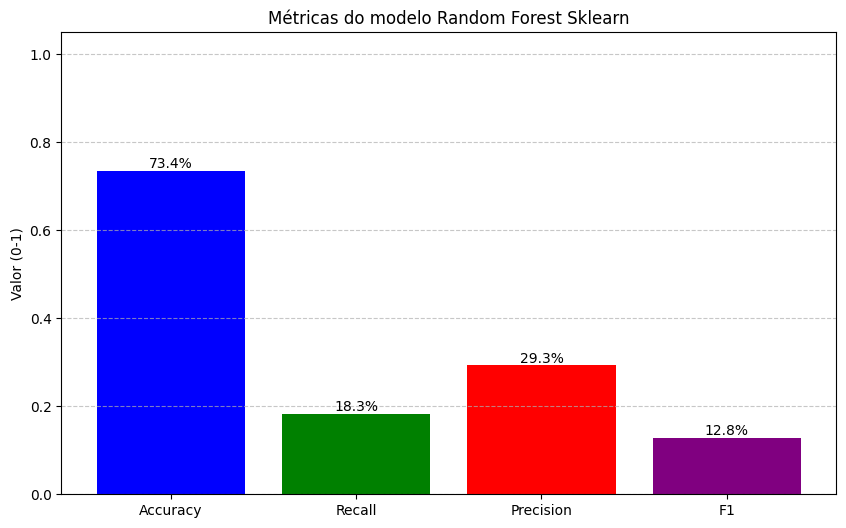

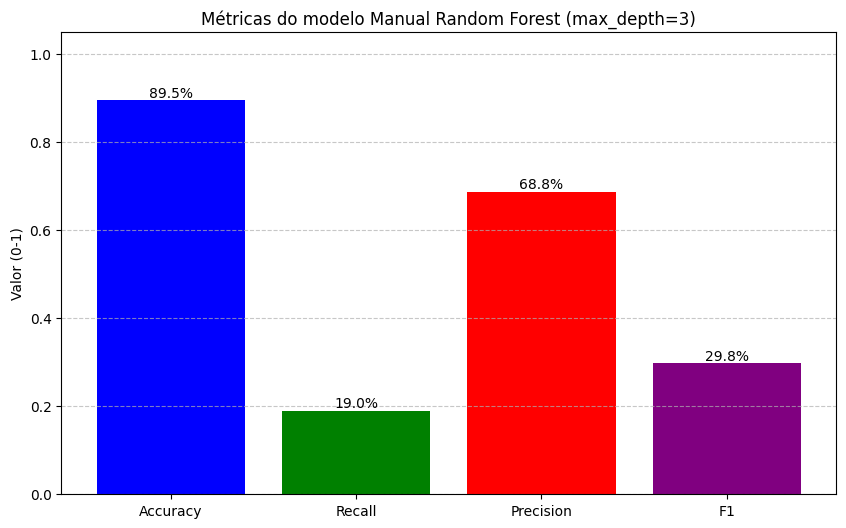

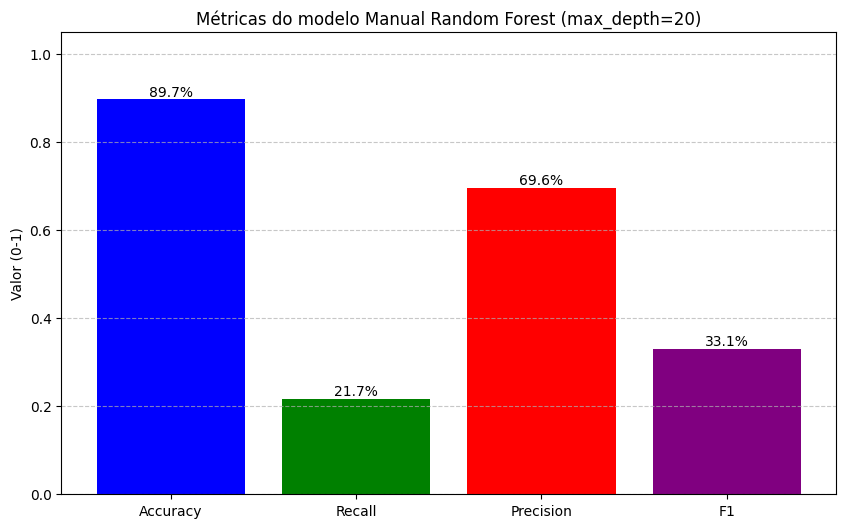

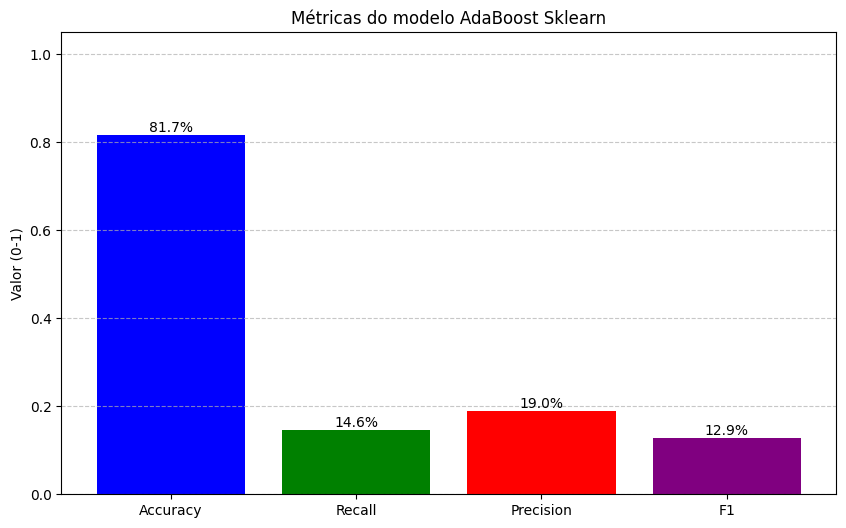

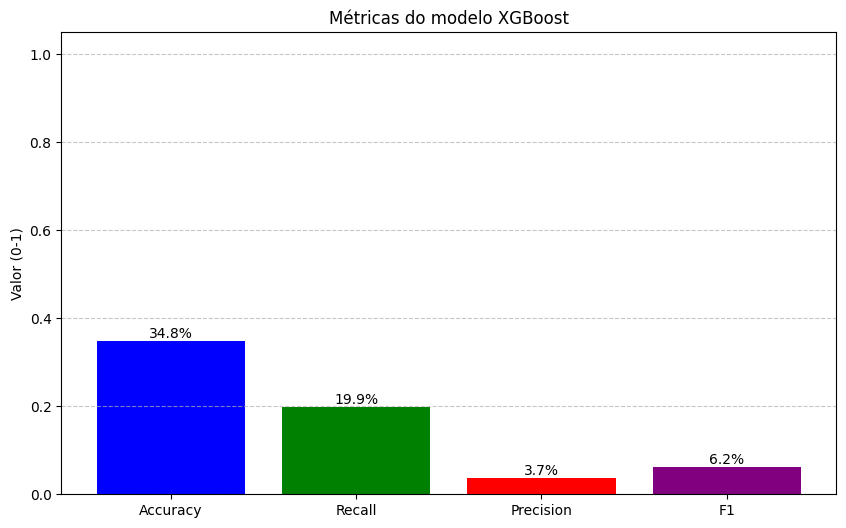

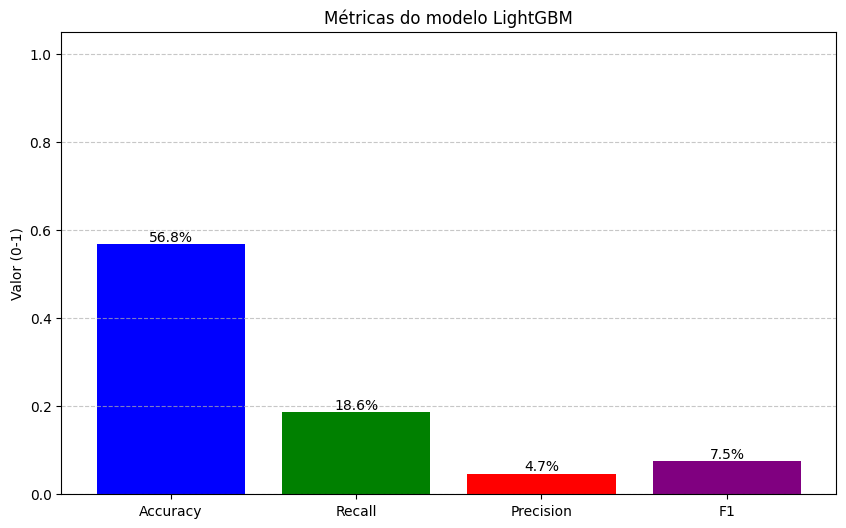

In [ ]:
for model in results:
    model_name = model['model']

    metrics = {
        'Accuracy': float(model['accuracy'].strip('%')) / 100,
        'Recall': float(model['recall'].strip('%')) / 100,
        'Precision': float(model['precision'].strip('%')) / 100,
        'F1': float(model['f1'].strip('%')) / 100
    }

    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])

    plt.title(f'Métricas do modelo {model_name}')
    plt.ylabel('Valor (0-1)')
    plt.ylim(0, 1.05)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.1%}',
                 ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Questão 8:
Analise os erros dos modelos utilizando as matrizes de confusão. Qual modelo teve maior taxa de falsos positivos e falsos negativos? Escolha dois modelos e, com base nas características dos dados, tente explicar por que eles erram onde erram. O que você sugeriria para melhorar o desempenho?

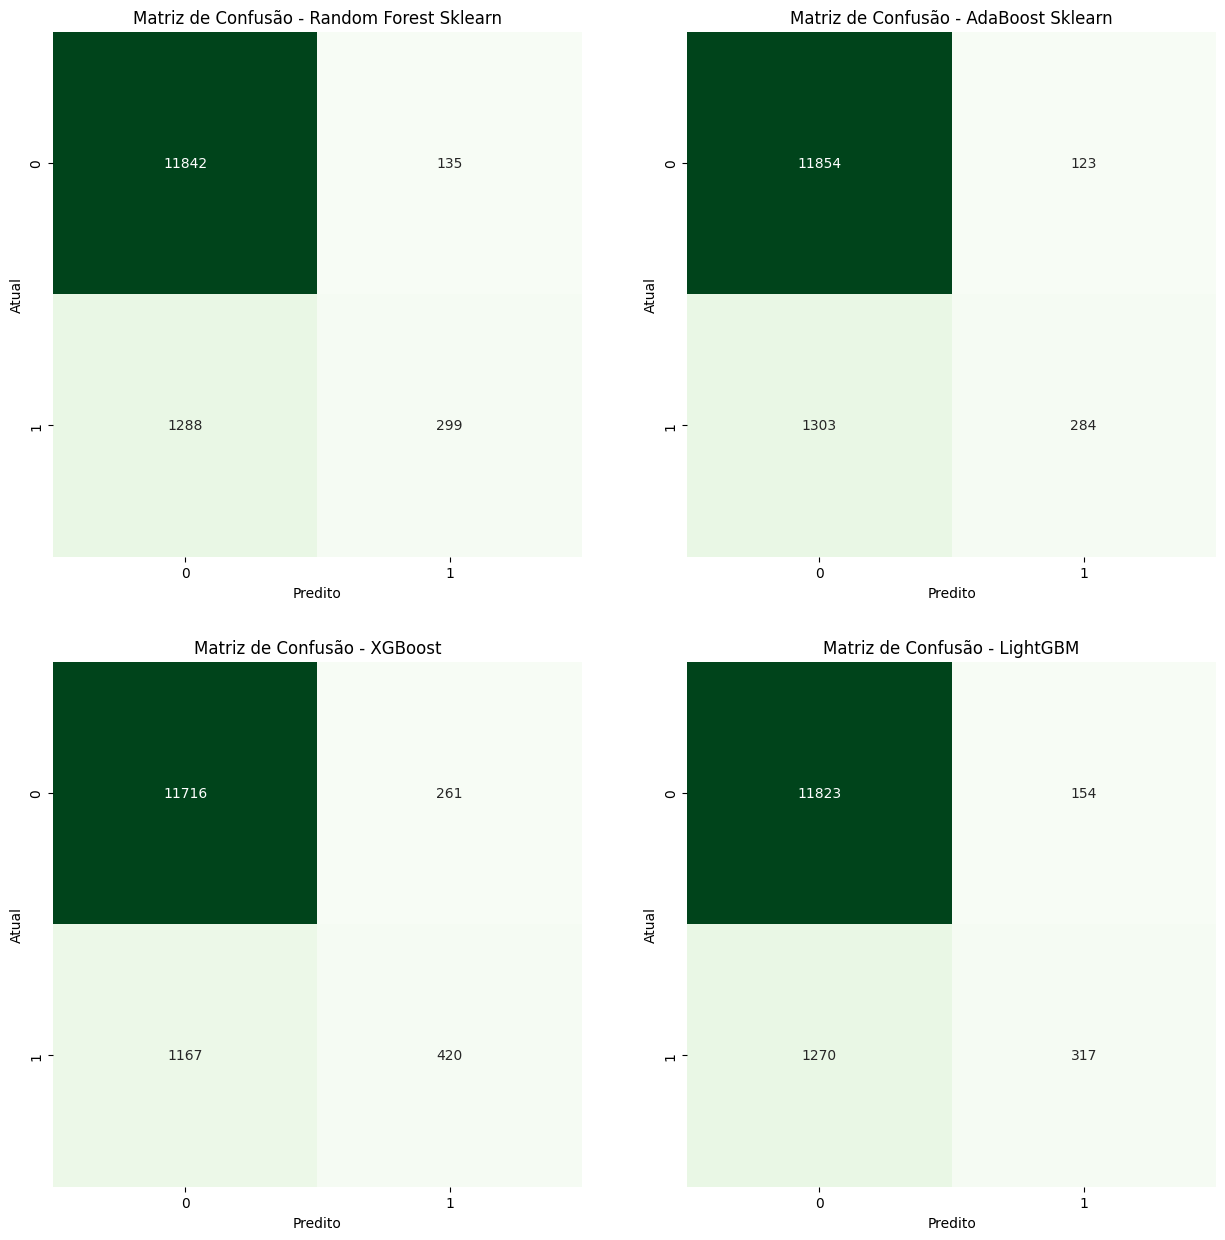

In [ ]:
roc_models = ['Random Forest Sklearn', 'AdaBoost Sklearn', 'XGBoost', 'LightGBM']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, model_name in enumerate(roc_models):
    model_data = [m for m in results if m['model'] == model_name][0]
    if model_data:
        y_pred = model_data['y_pred']
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[idx])
        axes[idx].set_xlabel('Predito')
        axes[idx].set_ylabel('Atual')
        axes[idx].set_title(f'Matriz de Confusão - {model_name}')

plt.show()

R: Considerando que o dataset é extremamente desbalanceado, tanto o AdaBoost quanto o Random Forest tiveram um alto número de Falso Negativos, pois é "mais fácil de acertar" se predizerem Falso a maior parte do tempo. Dito isso, o AdaBoost é um pouco melhor em evitar Falso positivos, enquanto o Random Forest é discretamente melhor em evitar Falso negativos.

Para obtermos melhores métricas e diminuirmos os vieses dos modelos, teríamos que balancear o dataset (com dados sintéticos do SMOTE, por exemplo) ou penalizar mais o modelo de acordo com as classes (colocar class_weight de 5:1 como hiperparâmetro, para aumentar o peso da classe verdadeira, que é minoritária).